# Step 1 : Big Picture & Set up

In [ ]:
import sklearn # general ml package
# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(30)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Step 2 : Get the data

In [ ]:
from six.moves import urllib 

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/saqibrizvi11/MachineLearning/master/'
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + 'Codeathon%201/Processed/housing.csv'
if not os.path.isdir(HOUSING_PATH):
    os.makedirs(HOUSING_PATH)
tgz_path = os.path.join(HOUSING_PATH, "housing.csv")
urllib.request.urlretrieve(HOUSING_URL, tgz_path)

('datasets/housing/housing.csv', <http.client.HTTPMessage at 0x7f36052c7860>)

In [ ]:
import pandas as pd 

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    df = pd.read_csv(csv_path)
    df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    return df

housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


Here's a list of what all the headers stand for:
- CRIM : per capita crime rate by town 
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS : proportion of non-retail business acres per town 
- CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX : nitric oxides concentration (parts per 10 million) 
- RM : average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS : weighted distances to five Boston employment 
centres 
- RAD : index of accessibility to radial highways 
- TAX : full-value property-tax rate per \$10,000 
- PTRATIO : pupil-teacher ratio by town 
- B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT : % lower status of the population 
- MEDV : Median value of owner-occupied homes in \$1000's

In [ ]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [ ]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


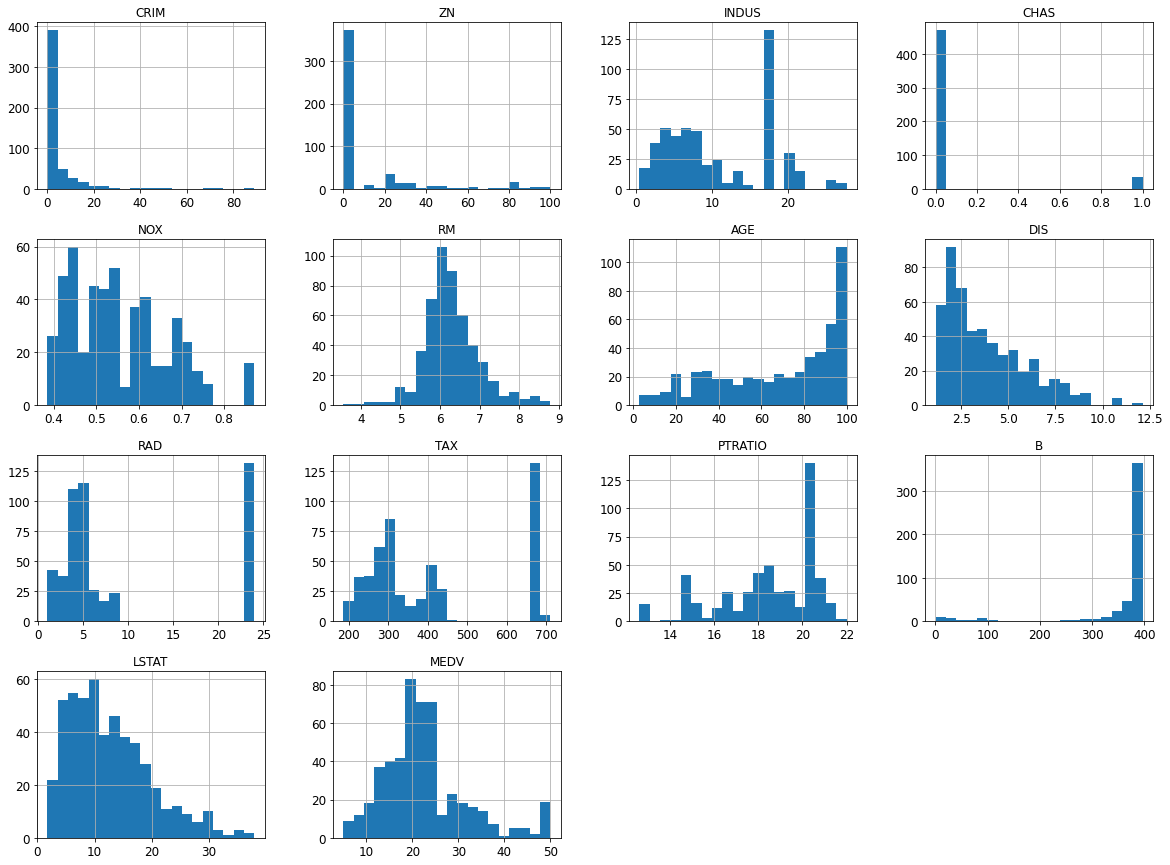

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=20, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=30)

In [ ]:
print( train_set.shape )
print( test_set.shape ) # No peeking at the test data though (data snooping bias)

(404, 14)
(101, 14)


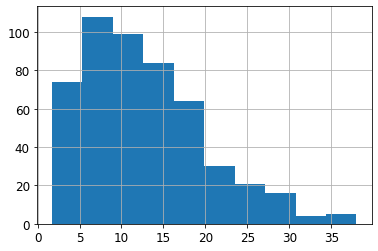

In [ ]:
housing['LSTAT'].hist()

Looking at the histogram for LSTAT (The percent of the population with a lower status), we observe how the data is right skewed meaning it is tail heavy. It would therefore be beneficial to transform the data such that it has a more bell-shaped/normal distribution. After we produce this normal distribution, we can then use it to do stratified random sampling within the test set. Since the test set, in our case, is very small, doing stratified random sampling may be very beneficial 

In [ ]:
# Since this histogram is "tail heavy" (extends much farther to the right from the median and to the left)
# We will try to transform this atrribute to have a more bell-shaped distribution
housing["LSTAT_normal"] = pd.cut(housing["LSTAT"],
                               bins=[0, 5, 10, 20, 30, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["LSTAT_normal"].value_counts()

3    213
2    157
4     62
1     61
5     12
Name: LSTAT_normal, dtype: int64

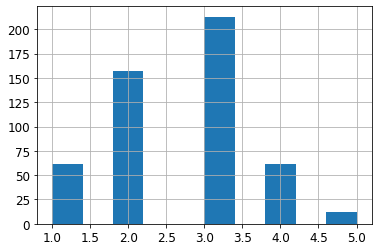

In [ ]:
housing["LSTAT_normal"].hist()

Now that the distribution looks more normal, we can conduct stratified sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index, test_index in split.split(housing, housing["LSTAT_normal"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["LSTAT_normal"].value_counts() / len(strat_test_set)

3    0.425743
2    0.316832
4    0.118812
1    0.118812
5    0.019802
Name: LSTAT_normal, dtype: float64

In [ ]:
housing["LSTAT_normal"].value_counts() / len(housing)

3    0.421782
2    0.310891
4    0.122772
1    0.120792
5    0.023762
Name: LSTAT_normal, dtype: float64

# Step 3 : Discover and visualize the data to get insights

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("LSTAT_normal", axis = 1, inplace=True)

In [ ]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

In [ ]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

In [ ]:
# Let's look at how much each feature correlates to the house value 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.742438
ZN         0.380584
B          0.318072
DIS        0.267414
CHAS       0.164014
CRIM      -0.396053
AGE       -0.405321
RAD       -0.408058
NOX       -0.437639
TAX       -0.506625
INDUS     -0.510658
PTRATIO   -0.555008
LSTAT     -0.736317
Name: MEDV, dtype: float64

We can see here that LSTAT and RM have the highest correlation with MEDV out of all the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3608937940>,
      dtype=object)

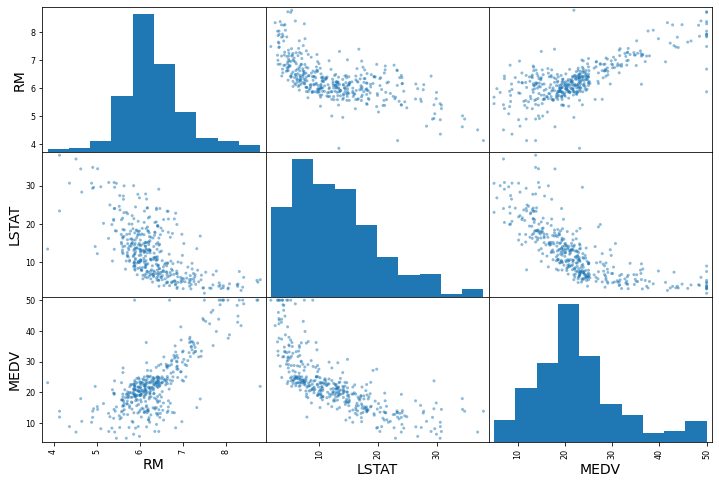

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["RM", "LSTAT", "MEDV"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

Feature Engineering: This refers to when multiple features can be combined together to creat a better and more meaningful feature. 

For reference, here's a list of all the features provided within the boston housing market dataset:
- CRIM : per capita crime rate by town 
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS : proportion of non-retail business acres per town 
- CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX : nitric oxides concentration (parts per 10 million) 
- RM : average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS : weighted distances to five Boston employment 
centres 
- RAD : index of accessibility to radial highways 
- TAX : full-value property-tax rate per \$10,000 
- PTRATIO : pupil-teacher ratio by town 
- B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT : % lower status of the population 
- MEDV : Median value of owner-occupied homes in \$1000's

If we look at the different labels for this dataset, we do not have any combinable quantitative variables that will give better insight into the prediction of housing value. Therefore, in this particular situation, we will not be combining variables to create new features


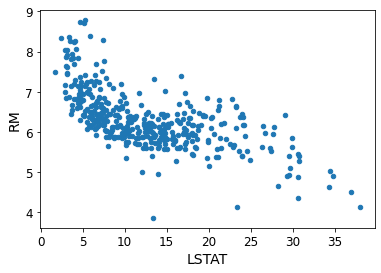

In [ ]:
housing.plot(kind="scatter", x="LSTAT", y="RM")

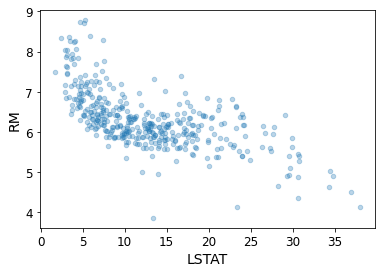

In [ ]:
# we set alpha equal to 0.3 to decrease the crowdedness of the plot
housing.plot(kind="scatter", x="LSTAT", y="RM", alpha = 0.3)

No handles with labels found to put in legend.


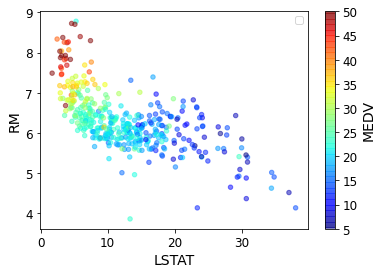

In [ ]:
# Add color (jet map) for the value of the housing
housing.plot(kind="scatter", x="LSTAT", y="RM", alpha=0.5,
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

# Step 4 : Cleaning the data / Preparing it for Machine Learning algorithms

In [ ]:
# Create the features and labels for training
housing = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


Since there are no incomplete rows, we don't have to deal with missing data

Additionally, since there are no categorical variables, no preprocessing of categorical variables is necessary

We now want to create the pipeline where an imputer and a standard scaler can be used sequentially. Although we don't need an imputer in our case, we include it within the pipeline to streamline the process in case future incoming data has any missing values. The standard scaler takes all the values within a feature and standardizes them allowing for machine learning algorithms to perform much better

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_prepared = num_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-0.38853793, -0.48581648, -0.63244445, ..., -0.24600137,
         0.44094661,  2.53949548],
       [-0.38697745, -0.48581648, -0.23203914, ...,  0.34911571,
         0.44094661,  0.20592335],
       [-0.41097195, -0.48581648,  0.0905896 , ...,  1.17312398,
         0.44094661, -0.49512585],
       ...,
       [ 0.20052064, -0.48581648,  0.97925893, ...,  0.80689808,
         0.42247086, -0.7842039 ],
       [-0.41109025,  2.48539678, -1.30506775, ..., -1.66512671,
         0.3720617 , -0.91547606],
       [-0.03204462, -0.48581648,  0.97925893, ...,  0.80689808,
         0.40068772,  0.24223267]])

# Step 5 : Select and train a model

In [ ]:
# Let's start out with a basic linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's try the num pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
# only using transform() here because we are simply trying to get the data through the pipeline rather than trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [11.13245596 18.9159191  21.55859256 17.05170792 17.14949924]


Now let's compare these predictions to the actual data

In [ ]:
print("Labels:", list(some_labels))

Labels: [14.4, 18.3, 20.6, 19.9, 19.6]


In [ ]:
some_data_prepared

array([[-0.38853793, -0.48581648, -0.63244445, -0.26761547, -0.93798887,
        -1.26015383,  0.93896293,  0.99782268, -0.75204506, -1.04739665,
        -0.24600137,  0.44094661,  2.53949548],
       [-0.38697745, -0.48581648, -0.23203914, -0.26761547,  0.24576845,
        -0.71109403,  0.06004325, -0.42085047, -0.40822061, -0.11217084,
         0.34911571,  0.44094661,  0.20592335],
       [-0.41097195, -0.48581648,  0.0905896 , -0.26761547,  0.14208168,
        -0.25794594,  0.27710438, -0.70922618, -0.98126135, -0.81063062,
         1.17312398,  0.44094661, -0.49512585],
       [-0.0756092 , -0.48581648,  0.97925893, -0.26761547,  0.85060795,
        -0.7597449 , -0.73703372, -0.33803537,  1.65472607,  1.51559562,
         0.80689808, -0.27185258,  0.21011289],
       [-0.25491787, -0.48581648,  1.19242435, -0.26761547,  2.71696985,
        -1.25320371,  1.10620676, -1.04082012, -0.52282876, -0.04114103,
        -1.71090495, -0.18973811,  0.09140934]])

Next, we find the Root Mean Squared Error and the Mean Absolute Error of the linear regression model on the entire training set


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.416816428565955

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.161101593358119

These values are pretty satisfactory but we should also take a look at other Machine Learning algorithms

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=30)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=30, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Since there is absolutely no error, it is very likely that this algorithm has badly overfit the data. Once this predictor is run on never before seen test data, the errors will most likely be much higher. This is where we use k-fold cross validation, dividing the training set into a validation and training set.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [5.40046866 5.33864319 3.89207806 5.74648578 4.12633312]
Mean: 4.9008017597808875
Standard deviation: 0.7448327015537567


Doing similar cross validation with the linear regression model, we get:

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.70534172 4.81005412 3.65889973 4.67447047 4.57307002]
Mean: 4.684367212032775
Standard deviation: 0.6514989978940287


Let's also try the Random Forrest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=30)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.2216428761433027

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5.08932902 3.47719547 2.76411462 3.68774526 2.66132508]
Mean: 3.535941889847124
Standard deviation: 0.8718003078564874


The random forest algorithm gives the best RMSE values out of the three ML models after 10-fold corss validation

# Step 6 : Fine tuning the model

By fine tuning the model, our goal is to find the best set of hyperparameters for our selected model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=30)
# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=30,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found  from the grid search was: 

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.649695625538396 {'max_features': 2, 'n_estimators': 3}
3.9437659709915107 {'max_features': 2, 'n_estimators': 10}
3.856721434356158 {'max_features': 2, 'n_estimators': 30}
4.0914758992683256 {'max_features': 4, 'n_estimators': 3}
3.6891439825620886 {'max_features': 4, 'n_estimators': 10}
3.6973121120033308 {'max_features': 4, 'n_estimators': 30}
4.21424454255705 {'max_features': 6, 'n_estimators': 3}
3.7273146777257913 {'max_features': 6, 'n_estimators': 10}
3.6332115178544875 {'max_features': 6, 'n_estimators': 30}
4.395067123557515 {'max_features': 8, 'n_estimators': 3}
3.819532579185153 {'max_features': 8, 'n_estimators': 10}
3.5825273276693848 {'max_features': 8, 'n_estimators': 30}
4.555616914672592 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.9832196996808906 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.566812619697611 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.9640922917524084 {'bootstrap': False, 'max_features': 3, 'n_estimat

We can also use RandomizedSearchCV since our hyperparameter space is very large

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=30)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=30)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.5465820332521885 {'max_features': 6, 'n_estimators': 166}
3.5903085446328764 {'max_features': 6, 'n_estimators': 46}
3.5485384320310893 {'max_features': 5, 'n_estimators': 141}
3.709036047398884 {'max_features': 3, 'n_estimators': 54}
3.600836584425702 {'max_features': 4, 'n_estimators': 146}
3.5172770331167778 {'max_features': 7, 'n_estimators': 132}
3.98278412866041 {'max_features': 2, 'n_estimators': 8}
3.8246762080956263 {'max_features': 2, 'n_estimators': 178}
3.5477848302961177 {'max_features': 6, 'n_estimators': 190}
3.694365887570026 {'max_features': 4, 'n_estimators': 19}


By inspecting the best model, we can find the relative importance of each attribute in predicting the median value of owner occupied homes

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.94734984e-02, 1.19067323e-03, 4.91605560e-02, 4.32047616e-04,
       3.17774640e-02, 4.59793910e-01, 2.21937181e-02, 4.68920951e-02,
       4.54775809e-03, 1.50194656e-02, 5.51985304e-02, 1.34582657e-02,
       2.70862018e-01])

In [ ]:
attributes = list(housing)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.45979390997434216, 'RM'),
 (0.27086201783814357, 'LSTAT'),
 (0.055198530437995955, 'PTRATIO'),
 (0.04916055597480373, 'INDUS'),
 (0.046892095074303516, 'DIS'),
 (0.03177746396026017, 'NOX'),
 (0.029473498382014653, 'CRIM'),
 (0.022193718092231435, 'AGE'),
 (0.015019465647603186, 'TAX'),
 (0.013458265677202878, 'B'),
 (0.004547758094606091, 'RAD'),
 (0.0011906732308440099, 'ZN'),
 (0.0004320476156488599, 'CHAS')]

After finding the best model, we finally want to see its performance on the test set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

3.57600844708753

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

2.308811881188118

From validation on the test set, we find that the model actually works really well. The final RMSE is calculated to be 3.576 and the MAE is calculated to be 2.309

Additionally, we can use statistics to calculate a 95% confidence interval for the test RMSE

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.10051511, 4.60038141])

We can be 95% confident that the root mean squared error for our Machine learning model is between 2.101 and 4.600

# Step 7 : Present your solution

We began with acquiring the data, labelling it and then exploring its characteristics to determine whether there are any adjustments that need to be made. Following this, the correlation between the different labels and the median value of owner-occupied homes (MEDV) was calculated. A high positive correlation was found between the house value and the average number of rooms (RM) and a high negative correlation was found between the house value and the percentage of population with a lower status (LSTAT). We then plotted out LSTAT and RM and graphed out our data using histograms, scatterplots, color plots to further explore our data. Additionally, no feature engineering was performed on the dataset as the labels were determined to be too different to create any new features.


Next, a pipeline is established to preprocess any incoming data. The pipeline consists of an imputer which replaces any missing numerical values with the median for the label. It also consists of a standard scaler which standardizes all the data to allow machine learning algorithms to perform much better. 

Amongst the machine learning algorithms used on the training data were Linear Regression, Decision Tree Regressor and Random Forrest Regressor. 5-fold cross validation on the Decision Tree Regressor revealed an RMSE of 4.900. Linear Regression led to a better RMSE of 4.680 using 5-fold cross validation. Finally, 5-fold cross validation on Random Forest Regressor gave the lowest RMSE of 3.536. 

Fine tuning the model helped increase the performance of the model further by altering the hyperparameters of the Random Forest Regressor. Using a randomized search cross validation the RMSE was reduced even further to 3.517, resulting in the final model.

When the performance of the model was measured on the test data, which the model had never interacted with, we were able to achieve great performance with a final RMSE of 3.576. By employing statistics, we were able to calculate a 95% confidence interval that the test RMSE will be between 2.100 and 4.600.


# Step 8 : Launch, Maintain, Update